In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import pyfiglet

In [2]:
def colors( n ):
    return "\033[38;5;%sm" % (n)

red = colors(1)
green = colors(2)
yellow = colors(3)
pink = colors(5)
cyan = colors(6)
orange = colors(208)
white = colors(15)

logo = pyfiglet.figlet_format("TOANTRAN")
    
print("%s%s%s" % (yellow, logo, pink))

 _____ ___    _    _   _ _____ ____      _    _   _ 
|_   _/ _ \  / \  | \ | |_   _|  _ \    / \  | \ | |
  | || | | |/ _ \ |  \| | | | | |_) |  / _ \ |  \| |
  | || |_| / ___ \| |\  | | | |  _ <  / ___ \| |\  |
  |_| \___/_/   \_\_| \_| |_| |_| \_\/_/   \_\_| \_|
                                                    



# PHẦN 1: DATA CLEANSING & FEATURE ENGINEERING
Hướng dẫn
1. Viết hàm load_data() để tải dữ liệu lên ứng dụng.Sau đó, hiển thị ra màn hình 10 dòng 
đầu tiên.


In [3]:
def load_data(filename):
    return pd.read_csv(filename)

In [5]:
df = load_data('titanic_disaster.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## 2. Thống kê dữ liệu thiếu trên các biến số và trực quan hóa dữ liệu thiếu bằng biểu đồ (Heat 
map). Hãy cho nhận xét về tình trạng thiếu dữ liệu Age, Cabin và Embarked

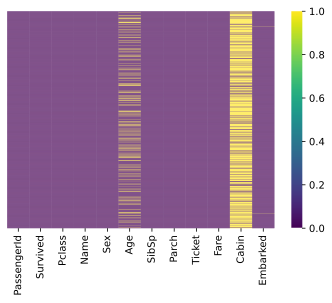

In [5]:
sns.heatmap(df.isna(), yticklabels= False, cmap = 'viridis',  cbar = True);

In [6]:
df[["Age","Cabin","Embarked"]].isna().count()

Age         891
Cabin       891
Embarked    891
dtype: int64

Text(0, 0.5, 'count')

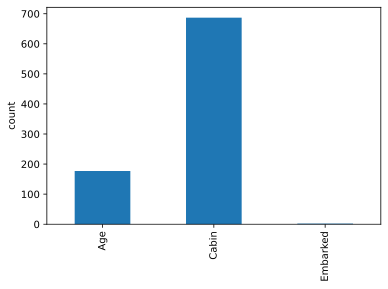

In [7]:
df[["Age","Cabin","Embarked"]].isna().sum().plot.bar()
plt.ylabel('count')

## 3. Xử lý tên cột tên Name, tách ra làm 2 cột: firstName và secondName. Lưu ý: Sau khi 
tách cột xong thì xóa luôn cột Name


In [8]:
df[["firstName","secondName"]] = df["Name"].str.split(",", expand = True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry


In [9]:
del df["Name"]
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry


## 4. Xứ lý rút gọn kích thước dữ liệu trên cột Sex như sau: thay thế male  M và female  F

In [10]:
df['Sex'] = df['Sex'].map({'male': 'M','female': 'F'})
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry


## 5. Xử lý dữ liệu thiếu trên biến Age bằng cách thay thế bằng giá trị trung bình tuổi: 
Hãy đưa ra quyết định dùng giá trị trung bình tuổi toàn bộ hành khách hay theo từng nhóm hạng vé (hạng hành khách: Pclass). 
Ta tiến hành làm các bước sau
### a. Sử dụng Seaborn để vẽ biểu đồ (Box plot) trực quan dữ liệu để xác định phân 
phối tuổi trên từng hạng hành khách. Nhận xét về tuổi trung bình giữa các nhóm 
hành khách. Từ đó đưa ra quyết định cách thay thế giá trị tuổi bị thiếu.
### b. Tiến hành thay thế giá trị Age bị thiếu. Sau đó, hiển thị kết quả dạng bảng và trực 
quan dữ liệu đã xử lý thiếu cho cột‘Age‘ bằng biểu đồ Heat map.


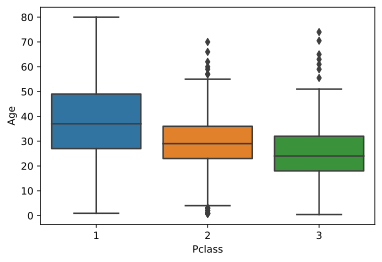

In [11]:
sns.boxplot(y = 'Age', x = 'Pclass', data = df)

## 6. Xây dựng biến số Agegroup có thang đo thứ tự được ánh xạ theo thang đo khoảng dựa 
trên độ tuổi của hành khách như sau: (age =< 12]  Kid; (12, 18]: Teen, (18, 60]: Adult 
và ( age > 60): Older


In [12]:
df.loc[(df.Age <= 12), 'Agegroup'] = 'Kid'
df.loc[(df.Age > 12) & (df.Age <= 18), 'Agegroup'] = 'Teen'
df.loc[(df.Age >18) & (df.Age <= 60), 'Agegroup'] = 'Adult'
df.loc[(df.Age > 60), 'Agegroup'] = 'Older'


In [13]:
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName,Agegroup
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris,Adult
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Adult
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina,Adult
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),Adult
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry,Adult
5,6,0,3,M,NaN,0,0,330877,8.4583,NaN,Q,Moran,Mr. James,NaN
6,7,0,1,M,54.0,0,0,17463,51.8625,E46,S,McCarthy,Mr. Timothy J,Adult
7,8,0,3,M,2.0,3,1,349909,21.0750,NaN,S,Palsson,Master. Gosta Leonard,Kid
8,9,1,3,F,27.0,0,2,347742,11.1333,NaN,S,Johnson,Mrs. Oscar W (Elisabeth Vilhelmina Berg),Adult
9,10,1,2,F,14.0,1,0,237736,30.0708,NaN,C,Nasser,Mrs. Nicholas (Adele Achem),Teen


## 7. Tiến hành thêm đặc trưng về danh xưng (namePrefix) trong xã hội bằng cách tách Mr, 
Mrs, Miss, Master ra khỏi ―secondName‖


In [14]:
df["secondName"] = df["secondName"].str.split(".", expand= True)[1]
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName,Agegroup
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Owen Harris,Adult
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,John Bradley (Florence Briggs Thayer),Adult
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Laina,Adult
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Jacques Heath (Lily May Peel),Adult
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S,Allen,William Henry,Adult


## 8. Khai thác thêm thông tin số lượng thành viên đi theo nhóm thân quen (familySize) đối 
với mỗi hành khách trên chuyến hải trình; family size = 1+ SibSp + Parch


In [15]:
df["familySize"] = 1 + df["SibSp"] +df["Parch"]
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName,Agegroup,familySize
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Owen Harris,Adult,2
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,John Bradley (Florence Briggs Thayer),Adult,2
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Laina,Adult,1
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Jacques Heath (Lily May Peel),Adult,2
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S,Allen,William Henry,Adult,1


## 9. Tạo thêm đặc trưng ‗Alone‘ để xác định hành khách đi theo nhóm hay cá nhân bằng cách 
dựa trên familySize như sau: Nếu familySize = 0 thì giá trị Alone = 1 và ngược lại là 0.


In [16]:
df["Alone"] = np.where(df['familySize'] == 0,'1','0')
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName,Agegroup,familySize,Alone
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Owen Harris,Adult,2,0
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,John Bradley (Florence Briggs Thayer),Adult,2,0
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Laina,Adult,1,0
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Jacques Heath (Lily May Peel),Adult,2,0
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S,Allen,William Henry,Adult,1,0
5,6,0,3,M,NaN,0,0,330877,8.4583,NaN,Q,Moran,James,NaN,1,0
6,7,0,1,M,54.0,0,0,17463,51.8625,E46,S,McCarthy,Timothy J,Adult,1,0
7,8,0,3,M,2.0,3,1,349909,21.0750,NaN,S,Palsson,Gosta Leonard,Kid,5,0
8,9,1,3,F,27.0,0,2,347742,11.1333,NaN,S,Johnson,Oscar W (Elisabeth Vilhelmina Berg),Adult,3,0
9,10,1,2,F,14.0,1,0,237736,30.0708,NaN,C,Nasser,Nicholas (Adele Achem),Teen,2,0


## 10. Tiến hành tách loại cabin (typeCabin) mà hành khách ở để lọc và phân tích đặc tính 
cabin. Loại cabin được kí hiệu bởi chữ cái đầu tiên. Lưu ý: Đối với dữ liệu cabin bị thiếu 
thì thay thế bằng ―Unknown‖


In [17]:
df["typeCabin"] = df['Cabin'].str[:1]
df["typeCabin"] = df["typeCabin"].fillna('Unknown')
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName,Agegroup,familySize,Alone,typeCabin
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Owen Harris,Adult,2,0,Unknown
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,John Bradley (Florence Briggs Thayer),Adult,2,0,C
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Laina,Adult,1,0,Unknown
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Jacques Heath (Lily May Peel),Adult,2,0,C
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S,Allen,William Henry,Adult,1,0,Unknown


## 11. Loại bỏ dữ liệu thừa đối với các hành khách xuất hiện trong cả 2 tập dữ liệu huấn luyện 
(train.csv) và đánh giá (test.csv). Ưu tiên giữ lại dữ liệu trong tập huấn luyện.

# PHẦN 2: KHAI THÁC THÔNG TIN HỮU ÍCH – EDA
Hướng dẫn: Sinh viên cần đưa ra nhận xét sau mỗi biểu đồ trực quan nhằm rút trích được 
thông tin có giá trị về hành khách sống sót dựa trên các đặc trưng bên trên

## 12. Trực quan thông tin tương quan tỉ lệ sống sót và thiệt mạng trên từng nhóm giới tính.

In [18]:
def barchart(feature):
    fig, axs = plt.subplots(figsize=(13, 5))
    sns.countplot(x=feature, hue='Survived', data=df)
    plt.xlabel('{}'.format(feature), size=20, labelpad=15)
    plt.ylabel('Passenger Count', size=20, labelpad=15)    
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)
    
    plt.legend(['Not Survived', 'Survived'], loc='upper center', prop={'size': 18})
    plt.title('Count of Survival in {} Feature'.format(feature), size=20, y=1.05)


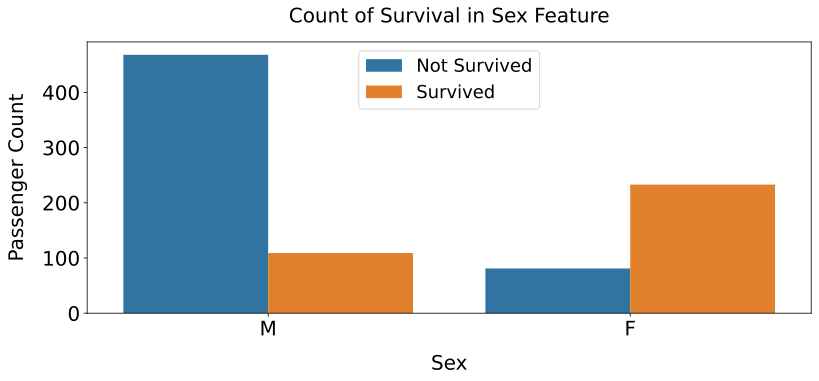

In [19]:
barchart("Sex")

## 13. Trực quan thông tin hành khách sống sót trên từng nhóm phân loại hành khách (Pclass).

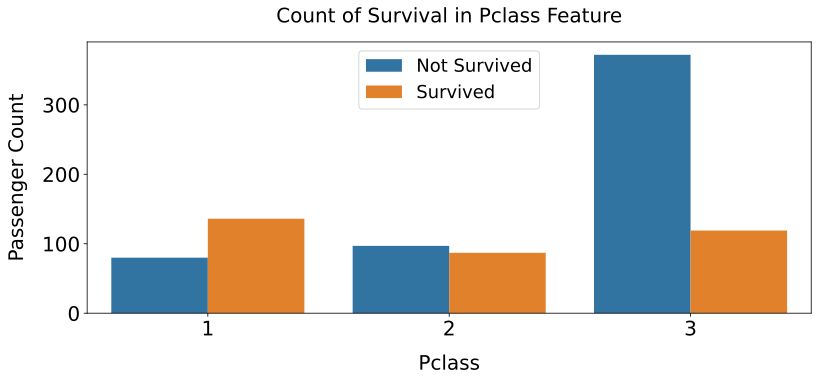

In [20]:
barchart("Pclass")

## 14. Trực quan thông tin hành khách sống sót trên từng nhóm giới tính và thang đo tuổi tác

In [21]:
df = pd.read_csv("./data/titanic_disaster.csv")
missing_ages = df[df['Age'].isnull()]
# determine mean age based on Sex and Pclass
mean_ages = df.groupby(['Sex','Pclass'])['Age'].mean()

def remove_na_ages(row):
    '''
    function to check if the age is null and replace wth the mean from 
    the mean ages dataframe 
    '''
    if pd.isnull(row['Age']):
        return mean_ages[row['Sex'],row['Pclass']]
    else:
        return row['Age']

df['Age'] =df.apply(remove_na_ages, axis=1)

C:\Users\toant\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


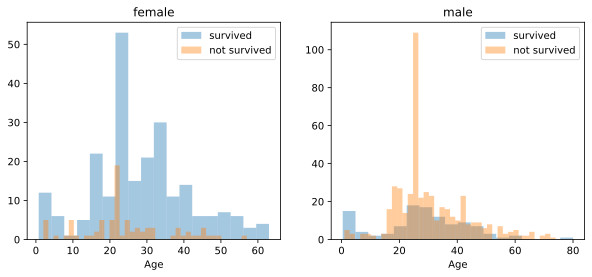

In [22]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))

women = df[df['Sex']=='female']
men = df[df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('male')

## 15. Trực quan xác suất hành khách sống sót dựa trên thông tin nhóm đi cùng



ValueError: Could not interpret input 'familySize'

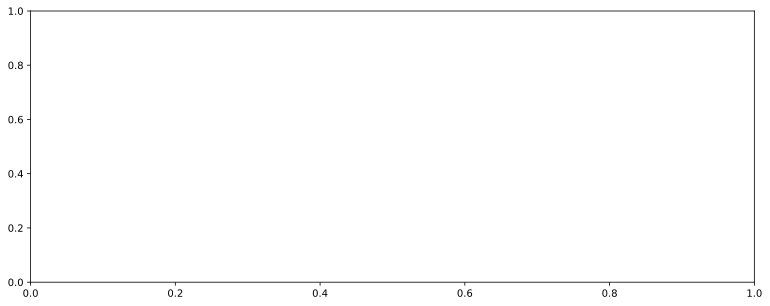

In [23]:
barchart("familySize")

## 16. Trực quan xác suất hành khách sống sót dựa trên thông tin giá vé


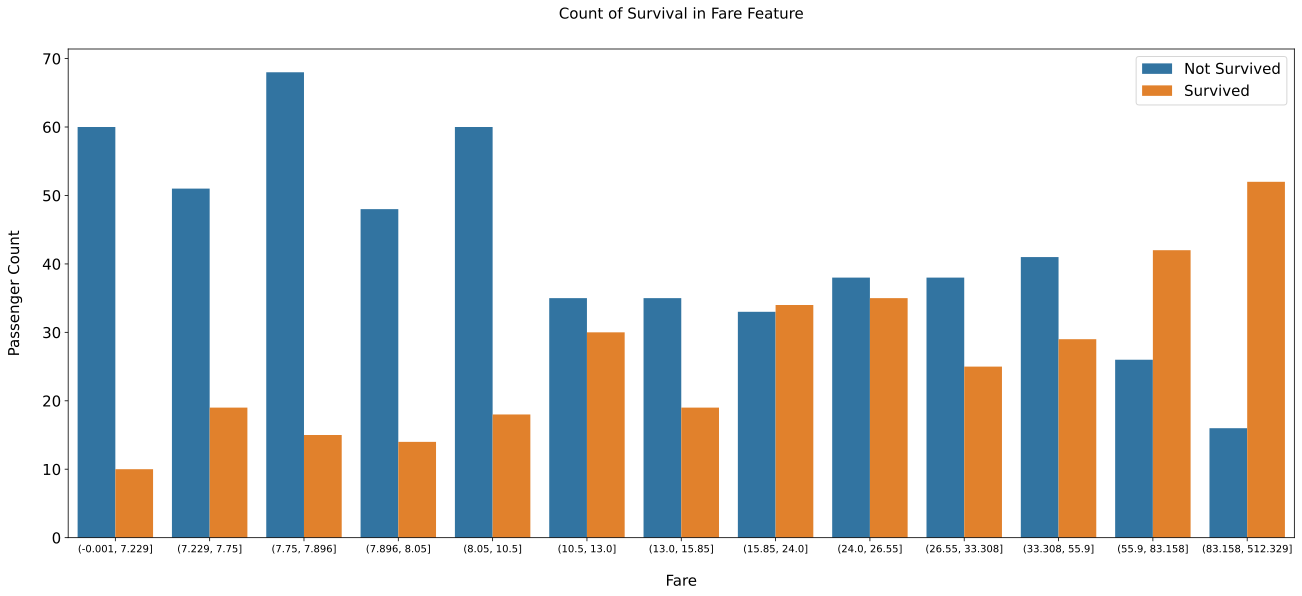

In [155]:
df['Fare'] = pd.qcut(df['Fare'], 13)

fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Fare', hue='Survived', data=df)

plt.xlabel('Fare', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Fare'), size=15, y=1.05)

plt.show()


## 17. Trực quan số lượng người thiệt mạng và sống sót theo phân lớp (Pclass) hành khách và 
cảng sẽ cập bến

In [ ]:
df.head()

In [219]:
women = df[df['Embarked']=="S"]
women[women['Survived']==1].Pclass.dropna().count()
women[women['Survived']==0].Pclass.dropna().count()

427

Text(0, 0.5, 'Count')

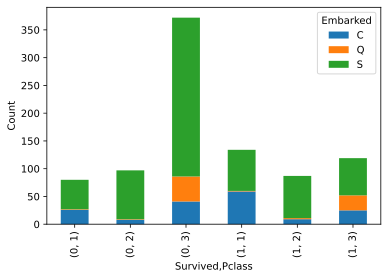

In [233]:
df.groupby(["Survived", "Pclass","Embarked"])["Survived"].count().unstack().plot(kind = 'bar', stacked = True)
#plt.xticks([0, 1],["Survived","Dead"], rotation = 0)
plt.ylabel("Count")

In [205]:
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

C:\Users\toant\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


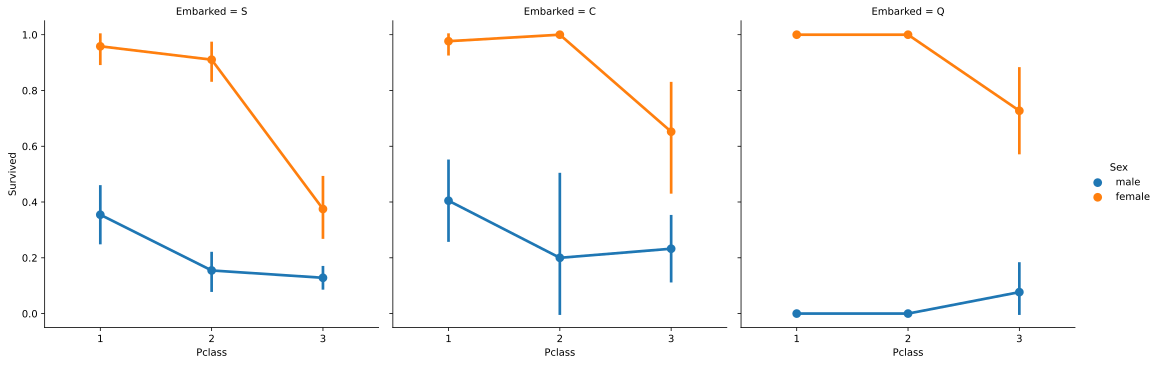

In [24]:
sns.factorplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=df)

C:\Users\toant\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\toant\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


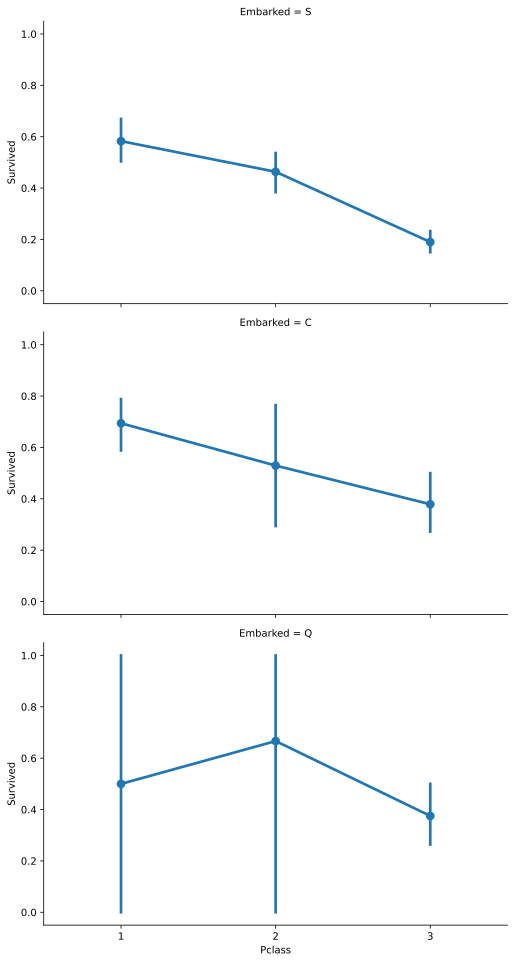

In [25]:
FacetGrid = sns.FacetGrid(df, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived')
FacetGrid.add_legend()